In [1]:
import sys

sys.path.insert(0, "/Users/jtlaune/Notes/notes/code_notebooks/")
sys.path.insert(0,"/Users/jtlaune/athena/vis/python/")
import athena_read
from mpl_styles import analytic
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors, ticker
import scipy as sp
import numpy as np
import os
import yt

accRunDir = "/Users/jtlaune/runs/JTrunII_Acc/"
noAccRunDir = "/Users/jtlaune/runs/JTrunII_noAcc/"
%matplotlib inline
mpl.rcParams["text.usetex"] = True

# Mesh calculations

In [66]:
rH = (1e-4/3)**(1./3)
rS = 0.00032
Nr1 = 256
Np1 = 1536
Lr = 1.2
Lp = 2*np.pi

dr1 = Lr/Nr1
dp1 = Lp/Np1
dr4 = dr1/2**4
dp4 = dp1/2**4
dr6 = dr1/2**6
dp6 = dp1/2**6

rH1dr = rH/dr1
rH4dr = rH/dr4
rH6dr = rH/dr6

rH1dp = rH/dp1
rH4dp = rH/dp4
rH6dp = rH/dp6

rS1dr = rS/dr1
rS4dr = rS/dr4
rS6dr = rS/dr6

rS1dp = rS/dp1
rS4dp = rS/dp4
rS6dp = rS/dp6

print("delta")
print(dr1,dr4,dr6)
print(dp1,dp4,dp6)

print("rH")
print(rH1dr,rH4dr,rH6dr)
print(rH1dp,rH4dp,rH6dp)

print("rS")
print(rS1dr,rS4dr,rS6dr)
print(rS1dp,rS4dp,rS6dp)


delta
0.0046875 0.00029296875 7.32421875e-05
0.0040906154343617095 0.00025566346464760684 6.391586616190171e-05
rH
6.865702290528925 109.8512366484628 439.4049465938512
7.867515292812191 125.88024468499506 503.52097873998025
rS
0.06826666666666667 1.0922666666666667 4.369066666666667
0.0782278376285284 1.2516454020564545 5.006581608225818


# PLots around accreted torque flip

In [68]:
for iout in range(125,136):
    accFname = accRunDir+f"{iout:05}_chunk.npz"
    noAccFname = noAccRunDir+f"{iout:05}_chunk.npz" 
    dataAcc = athena_read.athdf(accRunDir+f"ppd_cyl.out1.{iout:05}.athdf")
    dataNoAcc = athena_read.athdf(noAccRunDir+f"ppd_cyl.out1.{iout:05}.athdf")
    #get_bbox(1-1.1*0.032,1+1.1*0.032,-0.032*1.1,0.032*1.1,dataAcc,accFname)
    #get_bbox(1-1.1*0.032,1+1.1*0.032,-0.032*1.1,0.032*1.1,dataNoAcc,noAccFname)
    get_bbox(1-1.1*0.0032,1+1.1*0.0032,-0.0032*1.1,0.0032*1.1,dataAcc,accFname)
    get_bbox(1-1.1*0.0032,1+1.1*0.0032,-0.0032*1.1,0.0032*1.1,dataNoAcc,noAccFname)

/var/folders/rv/30_ngz5x5l5djjdvflk_6wwm0000gn/T/ipykernel_8223/2534091735.py:12: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  cs = ax.pcolormesh(RR*np.cos(TT),RR*np.sin(TT),dataAcc["rho"]/Sig0,norm=colors.LogNorm(vmin=1,vmax=1e1),cmap="inferno")


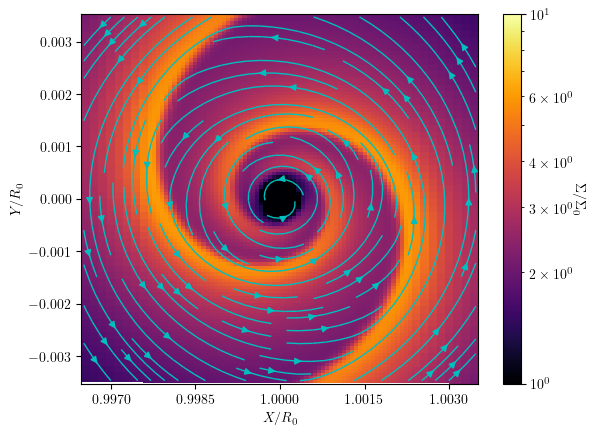

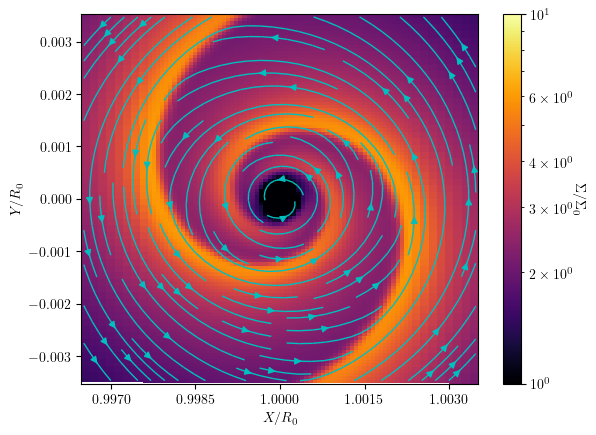

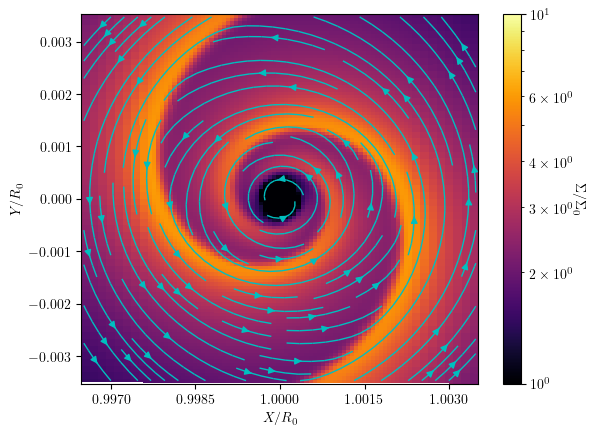

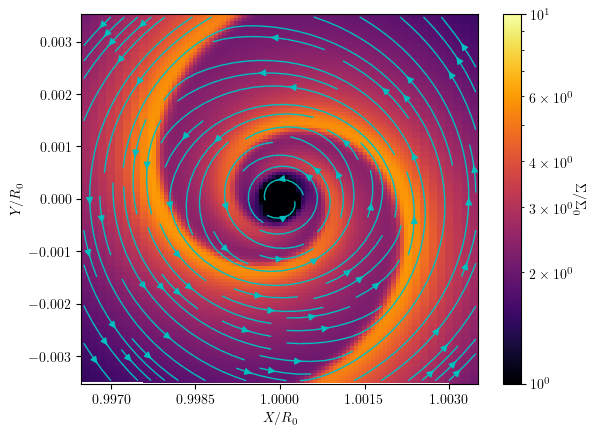

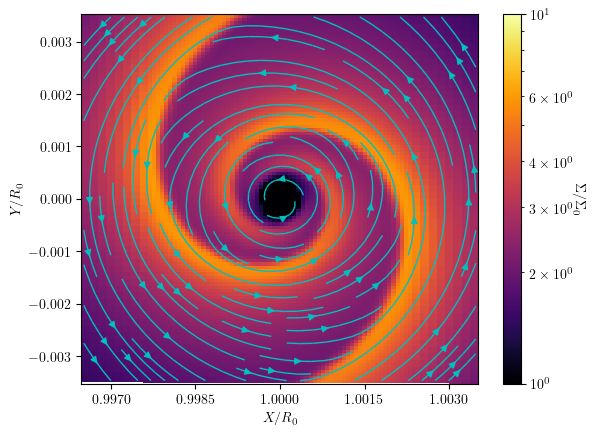

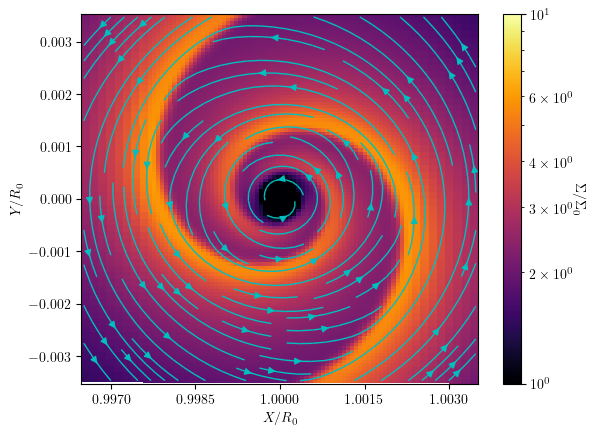

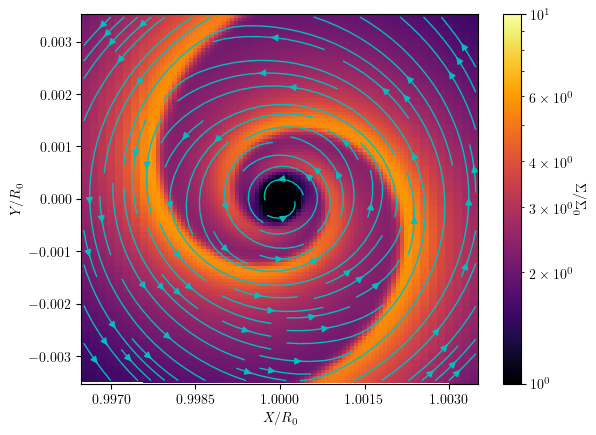

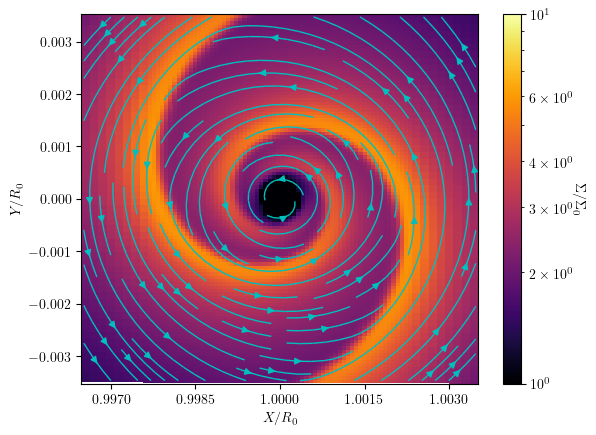

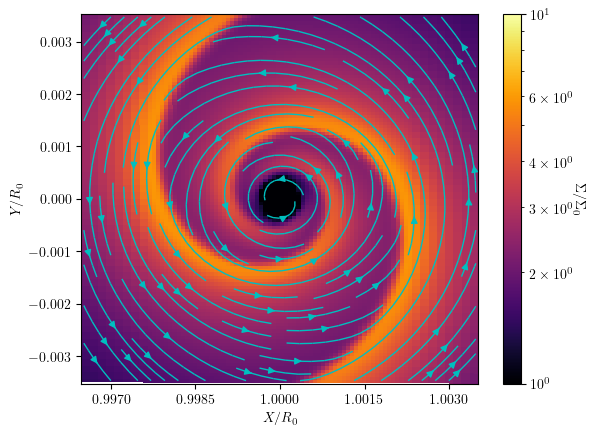

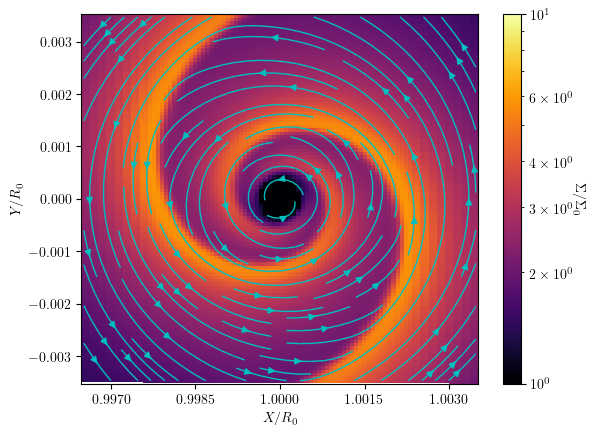

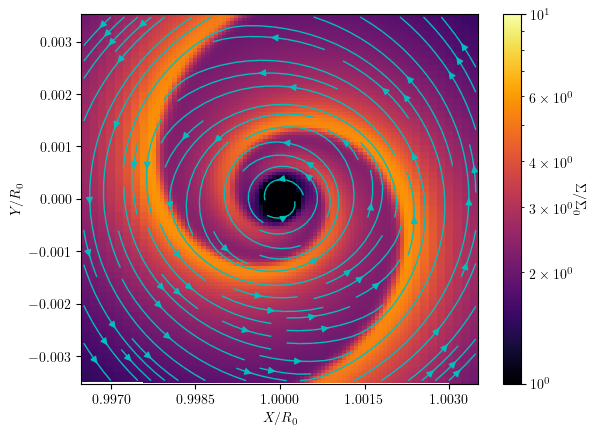

In [71]:
for iout in range(125,136):
    accFname = accRunDir+f"{iout:05}_chunk.npz"
    noAccFname = noAccRunDir+f"{iout:05}_chunk.npz" 
    dataAcc = np.load(accFname)
    dataNoAcc = np.load(noAccFname)

    interpx,interpy,interpxdot,interpydot = get_cartInterpVels(dataAcc, 500, 500)

    fig, ax = plt.subplots()
    Sig0 = 0.001
    RR,TT = np.meshgrid(dataAcc["r"],dataAcc["th"])
    cs = ax.pcolormesh(RR*np.cos(TT),RR*np.sin(TT),dataAcc["rho"]/Sig0,norm=colors.LogNorm(vmin=1,vmax=1e1),cmap="inferno")
    ax.streamplot(interpx,interpy,interpxdot,interpydot,linewidth=1,color="c")
    cb = plt.colorbar(cs)
    cb.ax.set_ylabel(r"$\Sigma/\Sigma_0$",rotation=270,labelpad=10)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
    ax.set_xlabel(r"$X/R_0$")
    ax.set_ylabel(r"$Y/R_0$")
    fig.savefig(f"/Users/jtlaune/Desktop/Accreting1_1RH-{iout:05}.png",dpi=300,bbox_inches="tight")


# Zoomed in plots (1.1 $R_H$)

In [61]:
def get_bbox(x1min,x1max,x2min,x2max,data_dict,filename):
    strobe = 1
    x1min_ind = np.where(data_dict["x1v"]>x1min)[0][0]
    x1max_ind = np.where(data_dict["x1v"]>x1max)[0][0]
    x2min_ind = np.where(data_dict["x2v"]>x2min)[0][0]
    x2max_ind = np.where(data_dict["x2v"]>x2max)[0][0]

    rho = data_dict["dens"][0,:,:]
    vr = data_dict["mom1"][0,::1,::1]/data_dict["dens"][0,::1,::1]
    vth = data_dict["mom2"][0,::1,::1]/data_dict["dens"][0,::1,::1]

    coordsr, coordsth = data_dict["x1v"], data_dict["x2v"]
    #coordsx = coordsr*np.cos(coordsth)
    #coordsy = coordsr*np.sin(coordsth)

    rc = coordsr[x1min_ind:x1max_ind:strobe]
    thc = coordsth[x2min_ind:x2max_ind:strobe]
    rhoc = rho[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe]
    vrc = vr[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe]
    vthc = vth[x2min_ind:x2max_ind:strobe,x1min_ind:x1max_ind:strobe]

    np.savez(filename,rho=rhoc,vr=vrc,vth=vthc,r=rc,th=thc)

def get_cartInterpVels(data,nx,ny):


    xg = np.linspace(data["r"][0],data["r"][-1]*np.cos(data["th"][0]),nx)
    yg = np.linspace(data["r"][0]*data["th"][0],data["r"][0]*data["th"][-1],ny)
    xg, yg = np.meshgrid(xg,yg)
    xg = xg.flatten()
    yg = yg.flatten()

    rc, thc = np.meshgrid(data["r"],data["th"])
    rc = rc.flatten()
    thc = thc.flatten()
    xc = (rc*np.cos(thc)).flatten()
    yc = (rc*np.sin(thc)).flatten()
    vrc = data["vr"].flatten()
    vthc = data["vth"].flatten()

    xdotc = vrc*np.cos(thc) - rc*np.sin(thc)*vthc
    ydotc = vrc*np.sin(thc) + rc*np.cos(thc)*vthc

    xdotg = sp.interpolate.griddata((xc,yc), xdotc, (xg,yg))
    ydotg = sp.interpolate.griddata((xc,yc), ydotc, (xg,yg))
    return(xg.reshape(nx,ny),yg.reshape(nx,ny),xdotg.reshape(nx,ny),ydotg.reshape(nx,ny)) 


In [54]:
iout = 380
accFname = accRunDir+f"{iout:05}_large_chunk.npz"
noAccFname = noAccRunDir+f"{iout:05}_large_chunk.npz" 

In [55]:
dataAcc = athena_read.athdf(accRunDir+f"ppd_cyl.out1.{iout:05}.athdf")
dataNoAcc = athena_read.athdf(noAccRunDir+f"ppd_cyl.out1.{iout:05}.athdf")
#get_bbox(1-1.1*0.032,1+1.1*0.032,-0.032*1.1,0.032*1.1,dataAcc,accFname)
#get_bbox(1-1.1*0.032,1+1.1*0.032,-0.032*1.1,0.032*1.1,dataNoAcc,noAccFname)
get_bbox(1-1.1*0.00064,1+1.1*0.00064,-0.00064*1.1,0.00064*1.1,dataAcc,accFname)
get_bbox(1-1.1*0.00064,1+1.1*0.00064,-0.00064*1.1,0.00064*1.1,dataNoAcc,noAccFname)

In [56]:
dataAcc = np.load(accFname)
dataNoAcc = np.load(noAccFname)

In [57]:
interpx,interpy,interpxdot,interpydot = get_cartInterpVels(dataAcc, 500, 500)

/var/folders/rv/30_ngz5x5l5djjdvflk_6wwm0000gn/T/ipykernel_1610/797955838.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  cs = ax.pcolormesh(RR*np.cos(TT),RR*np.sin(TT),dataAcc["rho"]/Sig0,norm=colors.LogNorm(vmin=1e-1,vmax=1e1),cmap="inferno")


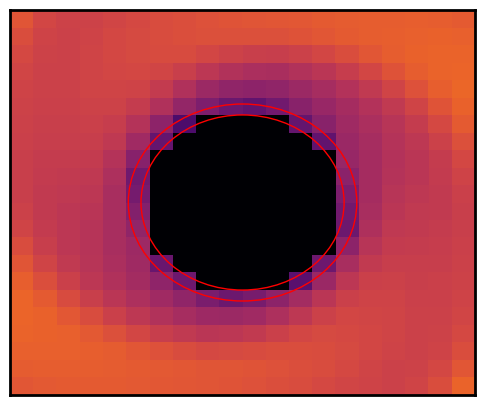

In [64]:
with mpl.rc_context(analytic):
    fig, ax = plt.subplots()
    Sig0 = 0.001
    RR,TT = np.meshgrid(dataAcc["r"],dataAcc["th"])
    cs = ax.pcolormesh(RR*np.cos(TT),RR*np.sin(TT),dataAcc["rho"]/Sig0,norm=colors.LogNorm(vmin=1e-1,vmax=1e1),cmap="inferno")
    #ax.streamplot(interpx,interpy,interpxdot,interpydot,linewidth=1,color="c")
    #cb = plt.colorbar(cs)
    #cb.ax.set_ylabel(r"$\Sigma/\Sigma_0$",rotation=270,labelpad=10)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
    ax.tick_params(left=False,bottom=False,labelleft=False,labelbottom=False,right=False,top=False)
    #ax.set_xlabel(r"$X/R_0$")
    #ax.set_ylabel(r"$Y/R_0$")
    circ = plt.Circle((1,0),0.00032, color='r',fill=False,zorder=100001)
    ax.add_patch(circ)
    circ = plt.Circle((1,0),0.00036, color='r',fill=False,zorder=100001)
    ax.add_patch(circ)
    #fig.savefig("/Users/jtlaune/Desktop/Accreting1_1RH.png",dpi=300,bbox_inches="tight")
    fig.savefig("/Users/jtlaune/Desktop/sinkZoomIn.png",dpi=300,bbox_inches="tight")

In [28]:
interpx,interpy,interpxdot,interpydot = get_cartInterpVels(dataNoAcc, 500, 500)

/var/folders/rv/30_ngz5x5l5djjdvflk_6wwm0000gn/T/ipykernel_99760/385680116.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  cs = ax.pcolormesh(RR*np.cos(TT),RR*np.sin(TT),dataNoAcc["rho"]/Sig0,norm=colors.LogNorm(vmin=1e-1,vmax=1e1),cmap="inferno")


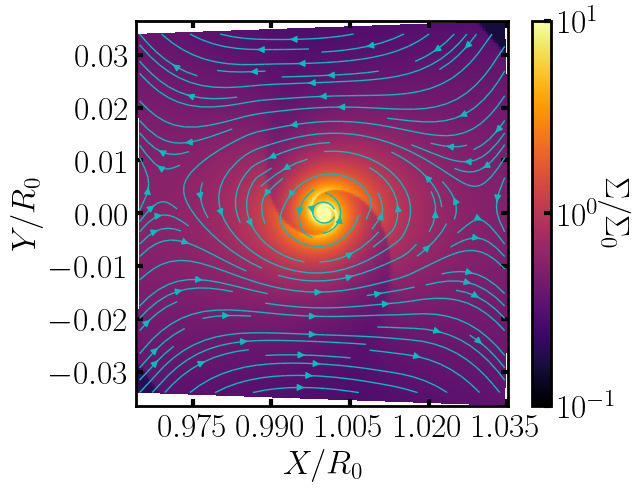

In [12]:
with mpl.rc_context(analytic):
    fig, ax = plt.subplots()
    Sig0 = 0.001
    RR,TT = np.meshgrid(dataNoAcc["r"],dataNoAcc["th"])
    cs = ax.pcolormesh(RR*np.cos(TT),RR*np.sin(TT),dataNoAcc["rho"]/Sig0,norm=colors.LogNorm(vmin=1e-1,vmax=1e1),cmap="inferno")
    ax.streamplot(interpx,interpy,interpxdot,interpydot,linewidth=1,color="c")
    cb = plt.colorbar(cs)
    cb.ax.set_ylabel(r"$\Sigma/\Sigma_0$",rotation=270,labelpad=10)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
    ax.set_xlabel(r"$X/R_0$")
    ax.set_ylabel(r"$Y/R_0$")
    fig.savefig("/Users/jtlaune/Desktop/NonAccreting1_1RH.png",dpi=300,bbox_inches="tight")

# Accretion rate (time averaged)

In [5]:
strobe = 1
dataAcc = np.loadtxt(accRunDir + "ppd_cyl.hst")[::strobe,:]
dataNoAcc = np.loadtxt(noAccRunDir + "ppd_cyl.hst")[::strobe,:]

In [20]:
def runningTimeAverage(x,dt,N):
    if N%2==0: raise Warning("N must be odd")
    y = np.zeros((len(x)))
    for ctr in range(len(x)):
        ind1 = int(ctr-(N-1)/2)
        ind2 = int(ctr+(N-1)/2)+1
        if ind1<0: y[ctr] = 0
        elif ind2>len(x): y[ctr] = 0
        else:
            if len(x[ind1:ind2])!=N: raise Warning(f"{(ind1,ind2)}")
            y[ctr] = np.sum(x[ind1:ind2]*dt[ind1:ind2])/np.sum(dt[ind1:ind2])
    return(y)

In [7]:
tlim = 380
t=dataAcc[:,0]/np.pi/2
it = np.where(t>tlim)[0][0]
dt = dataAcc[:it,1]
x = dataAcc[:it,-3]
print(len(x))
timeAvg = runningTimeAverage(x, dt, 11)

99339046


In [8]:
np.savez(accRunDir+"timeAveragedAccRate.npz",timeAvg=timeAvg)

In [10]:
tlim = 380
t=dataNoAcc[:,0]/np.pi/2
it = np.where(t>tlim)[0][0]
dt = dataNoAcc[:it,1]
x = dataNoAcc[:it,-3]
print(len(x))
timeAvg = runningTimeAverage(x, dt, 11)

48811281


In [11]:
np.savez(noAccRunDir+"timeAveragedAccRate.npz",timeAvg=timeAvg)

In [120]:
timeAvg[:10]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.46838247e-08, 2.90822786e-08, 3.25097248e-08,
       3.40219992e-08, 3.55581318e-08])

In [12]:
noAccTimeAvgAcc = np.load(noAccRunDir+"timeAveragedAccRate.npz")
accTimeAvgAcc = np.load(accRunDir+"timeAveragedAccRate.npz")

In [13]:
print(noAccTimeAvgAcc["timeAvg"][0:20])
print(accTimeAvgAcc["timeAvg"][0:20])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.46838247e-08 2.90822786e-08 3.25097248e-08
 3.40219992e-08 3.55581318e-08 3.70991329e-08 3.87329824e-08
 4.05664298e-08 4.28631147e-08 4.61646099e-08 4.85157023e-08
 5.10362393e-08 5.32626563e-08 5.54505578e-08 5.74598522e-08]


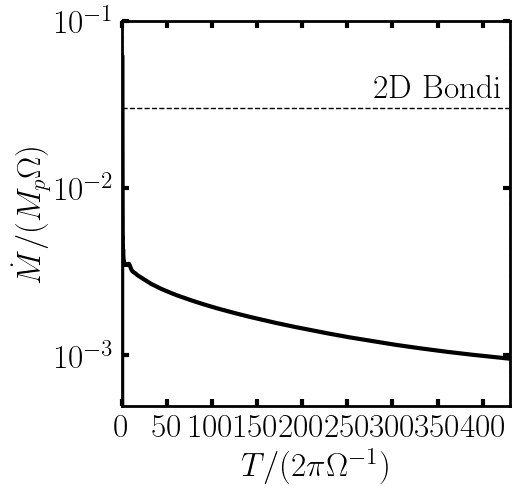

In [37]:
with mpl.rc_context(analytic):
    bondiNorm = 2*np.pi/0.05*0.00023882967936185247 
    bondiNorm0 = 2*np.pi/0.05*0.001
    fig, ax = plt.subplots(figsize=(5,5))
    q = 1e-4
    tlim = 430

    t=dataAcc[:,0]/np.pi/2
    it = np.where(t>tlim)[0][0]
    t = t[:it]
    ax.set_ylim(5e-4,1e-1)
    ax.set_yscale("log")
    ax.set_xlim((0,tlim))
    ax.set_ylabel("$\dot M/(M_p\Omega)$")
    ax.set_xlabel("$T/(2\pi\Omega^{-1})$")
    ax.axhline(y=bondiNorm,ls="--",lw=1,label="")
    #ax.plot(t,accTimeAvgAcc["timeAvg"][:it]/q)
    ax.plot(t,dataAcc[:it,-3]/q,c="k")
    ax.text(280,0.035,r"$\rm{2D~Bondi}$", fontsize=24)


In [34]:
print(bondiNorm)

0.03001222264569606


In [38]:
fig.savefig("/Users/jtlaune/Desktop/accretionRate.png",dpi=300,bbox_inches="tight")

# Gravitational torque plots

In [40]:
strobe = 1
dataAcc = np.loadtxt(accRunDir + "ppd_cyl.hst")[::strobe,:]
dataNoAcc = np.loadtxt(noAccRunDir + "ppd_cyl.hst")[::strobe,:]

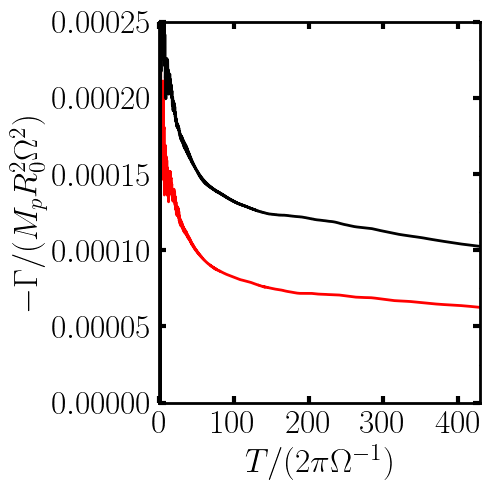

In [39]:
with mpl.rc_context(analytic):
    fig, ax = plt.subplots(figsize=(5,5))
    q = 1e-4
    tlim = 430

    t=dataAcc[:,0]/np.pi/2
    it = np.where(t>tlim)[0][0]
    t = t[:it]
    FP_x=dataAcc[:it,-7]
    FP_y=dataAcc[:it,-6]
    Fsgrav_x=dataAcc[:it,-5]
    Fsgrav_y=dataAcc[:it,-4]
    accrate=dataAcc[:it,-3]
    momx_accrate =dataAcc[:it,-2]
    momy_accrate =dataAcc[:it,-1]
    ax.plot(t,-(Fsgrav_y)/q,c="r",lw=2,label="Accreting")

    t=dataNoAcc[:,0]/np.pi/2
    it = np.where(t>tlim)[0][0]
    t = t[:it]
    FP_x=dataNoAcc[:it,-7]
    FP_y=dataNoAcc[:it,-6]
    Fsgrav_x=dataNoAcc[:it,-5]
    Fsgrav_y=dataNoAcc[:it,-4]
    accrate=dataNoAcc[:it,-3]
    momx_accrate =dataNoAcc[:it,-2]
    momy_accrate =dataNoAcc[:it,-1]
    ax.plot(t,-(Fsgrav_y)/q,c="k",lw=2,label="Softened")
    ax.yaxis.set_minor_locator(ticker.MaxNLocator((10)))

    ax.set_ylim(0,2.5e-4)
    #ax.set_yscale("log")
    ax.set_xlim(0,tlim)
    ax.set_ylabel(r"$-\Gamma/(M_pR_0^2\Omega^2)$")
    ax.set_xlabel(r"$T/(2\pi\Omega^{-1})$")
    fig.tight_layout()

In [40]:
fig.savefig("/Users/jtlaune/Desktop/torqGravComp.png",dpi=300,bbox_inches="tight")

# Total torque plots

In [43]:
strobe = 1
dataAcc = np.loadtxt(accRunDir + "ppd_cyl.hst")[::strobe,:]
dataNoAcc = np.loadtxt(noAccRunDir + "ppd_cyl.hst")[::strobe,:]

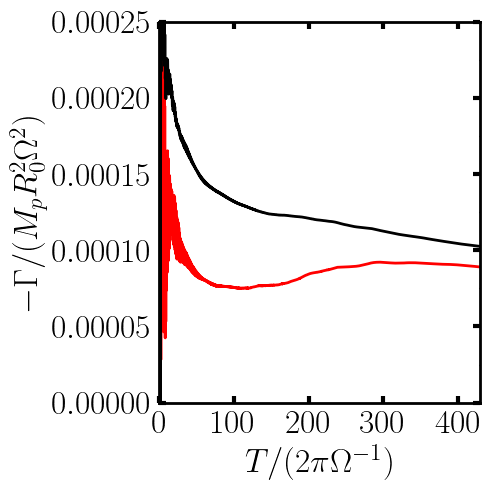

In [11]:
with mpl.rc_context(analytic):
    fig, ax = plt.subplots(figsize=(5,5))
    q = 1e-4
    tlim = 430

    t=dataAcc[:,0]/np.pi/2
    it = np.where(t>tlim)[0][0]
    t = t[:it]
    FP_x=dataAcc[:it,-7]
    FP_y=dataAcc[:it,-6]
    Fsgrav_x=dataAcc[:it,-5]
    Fsgrav_y=dataAcc[:it,-4]
    accrate=dataAcc[:it,-3]
    momx_accrate =dataAcc[:it,-2]
    momy_accrate =dataAcc[:it,-1]
    ax.plot(t,-(Fsgrav_y+FP_y+momy_accrate)/q,c="r",lw=2,label="Accreting")

    t=dataNoAcc[:,0]/np.pi/2
    it = np.where(t>tlim)[0][0]
    t = t[:it]
    FP_x=dataNoAcc[:it,-7]
    FP_y=dataNoAcc[:it,-6]
    Fsgrav_x=dataNoAcc[:it,-5]
    Fsgrav_y=dataNoAcc[:it,-4]
    accrate=dataNoAcc[:it,-3]
    momx_accrate =dataNoAcc[:it,-2]
    momy_accrate =dataNoAcc[:it,-1]
    ax.plot(t,-(Fsgrav_y+FP_y+momy_accrate)/q,c="k",lw=2,label="Softened")
    ax.yaxis.set_minor_locator(ticker.MaxNLocator((10)))

    ax.set_ylim(0,2.5e-4)
    #ax.set_yscale("log")
    ax.set_xlim(0,tlim)
    ax.set_ylabel(r"$-\Gamma/(M_pR_0^2\Omega^2)$")
    ax.set_xlabel(r"$T/(2\pi\Omega^{-1})$")
    fig.tight_layout()

In [5]:
def linearSciNotat(x,_):
    if x > 0:
        return("${:0.1f} \\times 10^{{{}}}$".format(10**(np.log10(x)%1),int(np.log10(x)-np.log10(x)%1)))
    elif x < 0:
        return("$-{:0.1f} \\times 10^{{{}}}$".format(10**(np.log10(-x)%1),int(np.log10(-x)-np.log10(-x)%1)))
    else:
        return("$0$")


In [ ]:
ax.yaxis.set_tick_params(labelsize=20)
ax.yaxis.set_major_formatter(linearSciNotat)
ax.legend()
fig

In [12]:
fig.savefig("/Users/jtlaune/Desktop/totalTorques.png",dpi=300,bbox_inches="tight")

# Torque from all forces

In [2]:
strobe = 1
dataAcc = np.loadtxt(accRunDir + "ppd_cyl.hst")[::strobe,:]
dataNoAcc = np.loadtxt(noAccRunDir + "ppd_cyl.hst")[::strobe,:]

In [3]:
strobe = 10000
dataAcc, dataNoAcc = dataAcc[::strobe],dataNoAcc[::strobe]

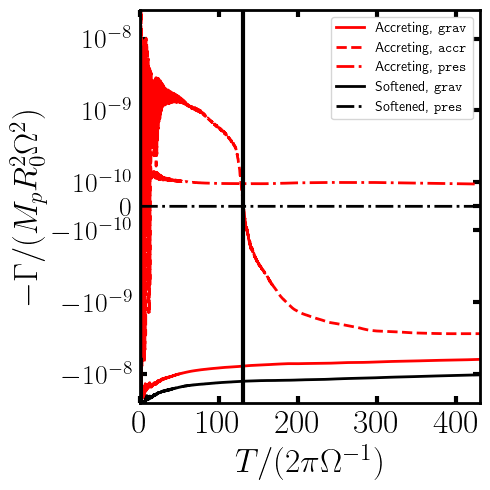

In [60]:
with mpl.rc_context(analytic):
    fig, ax = plt.subplots(figsize=(5,5))
    q = 1e-4
    tlim = 430

    t=dataAcc[:,0]/np.pi/2
    it = np.where(t>tlim)[0][0]
    t = t[:it]
    FP_x=dataAcc[:it,-7]
    FP_y=dataAcc[:it,-6]
    Fsgrav_x=dataAcc[:it,-5]
    Fsgrav_y=dataAcc[:it,-4]
    accrate=dataAcc[:it,-3]
    momx_accrate =dataAcc[:it,-2]
    momy_accrate =dataAcc[:it,-1]
    ax.plot(t,Fsgrav_y,c="r",lw=2,ls="-",label=r"Accreting, $\mathtt{grav}$")
    ax.plot(t,momy_accrate,c="r",lw=2,ls="--",label=r"Accreting, $\mathtt{accr}$")
    ax.plot(t,FP_y,c="r",lw=2,ls="-.",label=r"Accreting, $\mathtt{pres}$")

    t=dataNoAcc[:,0]/np.pi/2
    it = np.where(t>tlim)[0][0]
    t = t[:it]
    FP_x=dataNoAcc[:it,-7]
    FP_y=dataNoAcc[:it,-6]
    Fsgrav_x=dataNoAcc[:it,-5]
    Fsgrav_y=dataNoAcc[:it,-4]
    accrate=dataNoAcc[:it,-3]
    momx_accrate =dataNoAcc[:it,-2]
    momy_accrate =dataNoAcc[:it,-1]
    ax.plot(t,Fsgrav_y,c="k",lw=2,label=r"Softened, $\mathtt{grav}$")
    ax.plot(t,FP_y,c="k",lw=2,ls="-.",label=r"Softened, $\mathtt{pres}$")

    ax.yaxis.set_minor_locator(ticker.MaxNLocator((10)))

    #ax.set_ylim(0,2.5e-4)
    ax.set_ylim(-2.5e-8,2.5e-8)
    ax.set_yscale("symlog",linthresh=1e-10,linscale=0.3)
    ax.set_xlim(0,tlim)
    ax.set_ylabel(r"$-\Gamma/(M_pR_0^2\Omega^2)$")
    ax.set_xlabel(r"$T/(2\pi\Omega^{-1})$")
    ax.yaxis.set_tick_params(labelsize=20)
    #ax.yaxis.set_major_formatter(linearSciNotat)
    ax.legend()
    ax.axvline(130)
    fig.tight_layout()

In [9]:
fig.savefig("/Users/jtlaune/Desktop/torqueAllComp.png",dpi=90,bbox_inches="tight")

# Larger chunk (interp pcolor & streamplot)

In [20]:
iout = 260
ds = yt.load(accRunDir + f"/ppd_cyl.out1.{iout:05}.athdf")

yt : [WARNING  ] 2023-05-05 22:27:03,318 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-05 22:27:03,319 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-05 22:27:03,319 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-05 22:27:03,320 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-05 22:27:03,349 Parameters: current_time              = 1633.6215
yt : [INFO     ] 2023-05-05 22:27:03,350 Parameters: domain_dimensions         = [ 256 1536    1]
yt : [INFO     ] 2023-05-05 22:27:03,350 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-05 22:27:03,351 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-05 22:27:03,351 Parameters: cosmological_simulation   = 0


yt : [WARNING  ] 2023-05-05 23:05:36,749 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-05 23:05:36,750 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-05 23:05:36,750 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-05 23:05:36,750 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-05 23:05:36,767 Parameters: current_time              = 1633.6215
yt : [INFO     ] 2023-05-05 23:05:36,768 Parameters: domain_dimensions         = [ 256 1536    1]
yt : [INFO     ] 2023-05-05 23:05:36,768 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-05 23:05:36,768 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-05 23:05:36,769 Parameters: cosmological_simulation   = 0


(632832,)


/var/folders/rv/30_ngz5x5l5djjdvflk_6wwm0000gn/T/ipykernel_47878/1578534074.py:29: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(rr * np.cos(pp), rr * np.sin(pp), densg)


(1000, 1000) (1000, 1000) (1000, 1000) (1000, 1000)


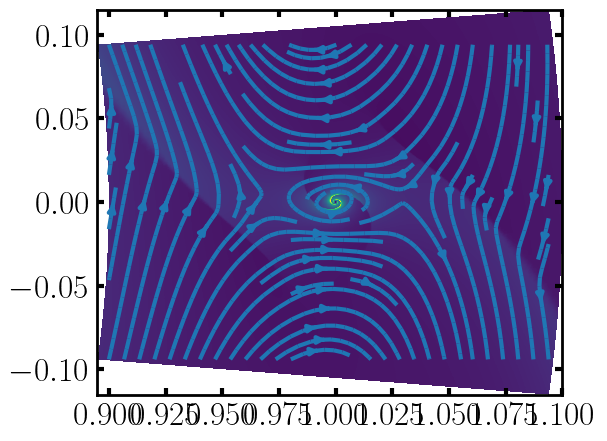

In [42]:
with mpl.rc_context(analytic):
    fig, ax = plt.subplots()
    ds = yt.load(accRunDir + f"/ppd_cyl.out1.{iout:05}.athdf")
    dd = ds.all_data()
    print(dd["athena_pp", "dens"].shape)
    rg = np.linspace(0.9, 1.1, 1000)
    pg = np.linspace(-np.pi / 30, np.pi / 30, 1000)
    rr, pp = np.meshgrid(rg, pg)
    densg = sp.interpolate.griddata(
        dd.fcoords[:, :2], dd["athena_pp", "dens"], (rr, pp), method="linear"
    )

    xg = np.linspace(rg[0],rg[-1]*np.cos(pg[0]),1000 )
    yg = np.linspace(rg[0]*np.sin(pg[0]),rg[0]*np.sin(pg[-1]),1000)
    xg,yg = np.meshgrid(xg,yg)
    vrg = sp.interpolate.griddata(
        (dd.fcoords[:, 0]*np.cos(dd.fcoords[:, 1]),dd.fcoords[:, 0]*np.sin(dd.fcoords[:, 1])),
        dd["athena_pp", "mom1"] / dd["athena_pp", "dens"],
        (xg, yg),
        method="linear",
    )
    vpg = sp.interpolate.griddata(
        (dd.fcoords[:, 0]*np.cos(dd.fcoords[:, 1]),dd.fcoords[:, 0]*np.sin(dd.fcoords[:, 1])),
        dd["athena_pp", "mom2"] / dd["athena_pp", "dens"],
        (xg, yg),
        method="linear",
    )

    plt.pcolormesh(rr * np.cos(pp), rr * np.sin(pp), densg)

    xdotg = vrg*(xg/np.sqrt(xg**2+yg**2)) - np.sqrt(xg**2+yg**2)*(yg/np.sqrt(xg**2+yg**2))*vpg
    ydotg = vrg*(yg/np.sqrt(xg**2+yg**2)) + np.sqrt(xg**2+yg**2)*(xg/np.sqrt(xg**2+yg**2))*vpg
    print(xg.shape,yg.shape,xdotg.shape,ydotg.shape)
    plt.streamplot(xg,yg,xdotg,ydotg)
    


In [ ]:
def get_cartInterpVels(data,nx,ny):
    xg = np.linspace(data["r"][0],data["r"][-1]*np.cos(data["th"][0]),nx)
    yg = np.linspace(data["r"][0]*data["th"][0],data["r"][0]*data["th"][-1],ny)
    xg, yg = np.meshgrid(xg,yg)
    xg = xg.flatten()
    yg = yg.flatten()

    rc, thc = np.meshgrid(data["r"],data["th"])
    rc = rc.flatten()
    thc = thc.flatten()
    xc = (rc*np.cos(thc)).flatten()
    yc = (rc*np.sin(thc)).flatten()
    vrc = data["vr"].flatten()
    vthc = data["vth"].flatten()

    xdotc = vrc*np.cos(thc) - rc*np.sin(thc)*vthc
    ydotc = vrc*np.sin(thc) + rc*np.cos(thc)*vthc

    xdotg = sp.interpolate.griddata((xc,yc), xdotc, (xg,yg))
    ydotg = sp.interpolate.griddata((xc,yc), ydotc, (xg,yg))
    return(xg.reshape(nx,ny),yg.reshape(nx,ny),xdotg.reshape(nx,ny),ydotg.reshape(nx,ny)) 


# Mass flux

I think this may be fundamentally a problem for my setup because i have no gas flowing through the domain? 

In [43]:
iout = 260
ds = yt.load(accRunDir + f"/ppd_cyl.out1.{iout:05}.athdf")

yt : [WARNING  ] 2023-05-05 23:09:38,196 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-05 23:09:38,196 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-05 23:09:38,197 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-05 23:09:38,197 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-05 23:09:38,214 Parameters: current_time              = 1633.6215
yt : [INFO     ] 2023-05-05 23:09:38,214 Parameters: domain_dimensions         = [ 256 1536    1]
yt : [INFO     ] 2023-05-05 23:09:38,215 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-05 23:09:38,215 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-05 23:09:38,215 Parameters: cosmological_simulation   = 0


yt : [WARNING  ] 2023-05-05 23:27:22,866 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-05 23:27:22,866 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-05 23:27:22,867 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-05 23:27:22,867 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-05 23:27:22,883 Parameters: current_time              = 1633.6248
yt : [INFO     ] 2023-05-05 23:27:22,884 Parameters: domain_dimensions         = [ 256 1536    1]
yt : [INFO     ] 2023-05-05 23:27:22,889 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-05 23:27:22,895 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-05 23:27:22,899 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2023-05-05 23:27:35,632 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-05 23:27:35,632 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-05 23:27:35,633 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-05 23:27:35,633 Assuming 1.0 = 1

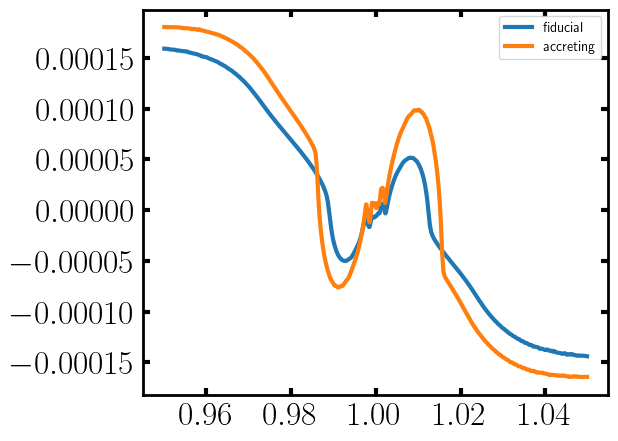

In [55]:
with mpl.rc_context(analytic):
    fig, ax = plt.subplots()
    rg = np.linspace(0.95,1.05,1000)
    pg = np.linspace(-np.pi,np.pi,6000)
    rr, pp = np.meshgrid(rg,pg)

    ds = yt.load(noAccRunDir + f"/ppd_cyl.out1.{iout:05}.athdf")
    dd = ds.all_data()
    dd["athena_pp","dens"].shape
    densg = sp.interpolate.griddata(dd.fcoords[:,:2],dd["athena_pp","dens"],(rr,pp),method="linear")
    densg = np.nan_to_num(densg,0)
    vrg = sp.interpolate.griddata(dd.fcoords[:,:2],dd["athena_pp","mom1"]/dd["athena_pp","dens"],(rr,pp),method="linear")
    vrg = np.nan_to_num(vrg,0)
    #ax.plot(rg[2:-2],np.mean(2*np.pi*rg*densg*vrg,axis=0)[2:-2],label=f"fiducial")
    ax.plot(rg[2:-2],np.mean(vrg,axis=0)[2:-2],label=f"fiducial")

    ds = yt.load(accRunDir + f"/ppd_cyl.out1.{iout:05}.athdf")
    dd = ds.all_data()
    dd["athena_pp","dens"].shape
    densg = sp.interpolate.griddata(dd.fcoords[:,:2],dd["athena_pp","dens"],(rr,pp),method="linear")
    densg = np.nan_to_num(densg,0)
    vrg = sp.interpolate.griddata(dd.fcoords[:,:2],dd["athena_pp","mom1"]/dd["athena_pp","dens"],(rr,pp),method="linear")
    vrg = np.nan_to_num(vrg,0)
    #ax.plot(rg[2:-2],np.mean(2*np.pi*rg*densg*vrg,axis=0)[2:-2],label=f"accreting")
    ax.plot(rg[2:-2],np.mean(vrg,axis=0)[2:-2],label=f"accreting")

    ax.legend()

# Fast density profile for multi-time comparison (griddata)

yt : [WARNING  ] 2023-05-07 19:39:04,448 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-07 19:39:04,449 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-07 19:39:04,449 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-07 19:39:04,450 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-07 19:39:04,467 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-05-07 19:39:04,468 Parameters: domain_dimensions         = [ 256 1536    1]
yt : [INFO     ] 2023-05-07 19:39:04,468 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-07 19:39:04,468 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-07 19:39:04,468 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2023-05-07 19:39:10,954 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-07 19:39:10,954 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-07 19:39:10,955 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-07 19:39:10,955 Assuming 1.0 = 1.0 K
y

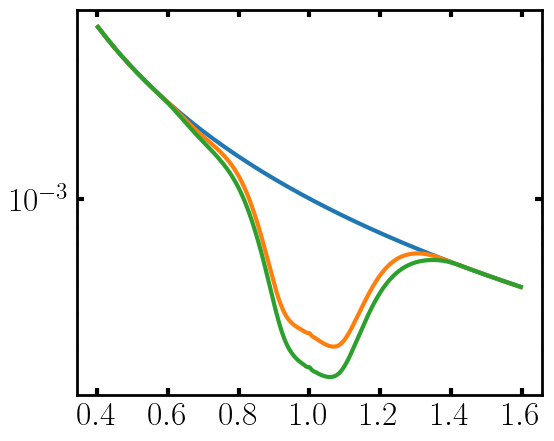

In [45]:
with mpl.rc_context(analytic):
    fig, ax = plt.subplots()
    for iout in [0,260,380]:
        ds = yt.load(accRunDir + f"/ppd_cyl.out1.{iout:05}.athdf")
        dd = ds.all_data()
        dd["athena_pp","dens"].shape
        rg = np.linspace(0.4,1.6,1000)
        pg = np.linspace(-np.pi,np.pi,6000)
        rr, pp = np.meshgrid(rg,pg)
        densg = sp.interpolate.griddata(dd.fcoords[:,:2],dd["athena_pp","dens"],(rr,pp),method="linear")
        densg = np.nan_to_num(densg,0)
        ax.plot(rg[2:-2],np.mean(densg,axis=0)[2:-2],label=f"T={iout} orbits")
        ax.set_yscale("log")

# Global density profile

In [16]:
iout = 430
dsAcc = yt.load(accRunDir + f"/ppd_cyl.out1.{iout:05}.athdf")
dsNoAcc = yt.load(noAccRunDir + f"/ppd_cyl.out1.{iout:05}.athdf")

yt : [WARNING  ] 2023-05-09 00:54:29,379 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-09 00:54:29,380 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-09 00:54:29,380 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-09 00:54:29,381 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-09 00:54:29,411 Parameters: current_time              = 2701.7737
yt : [INFO     ] 2023-05-09 00:54:29,412 Parameters: domain_dimensions         = [ 256 1536    1]
yt : [INFO     ] 2023-05-09 00:54:29,412 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-09 00:54:29,413 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-09 00:54:29,413 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2023-05-09 00:54:29,420 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-09 00:54:29,420 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-09 00:54:29,420 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-09 00:54:29,421 Assuming 1.0 = 1

In [18]:
q = 1e-4
dd = dsAcc.all_data()
dens_data = np.array(dd["athena_pp","dens"])
Nr = 256
istart = 0
iend = 256+1
edge_coords = np.linspace(0.4,1.6,Nr+1,endpoint=True)
print(dd.fcoords.shape)
coords = np.array(dd.fcoords)
midpts = (edge_coords[:-1]+edge_coords[1:])/2
fwidths = np.array(dd.fwidth)
print(dd.fwidth)
mRingAcc = np.zeros(Nr)
for j in range(istart,iend):
    reval = coords[j,0]
    for i, Sig in enumerate(dens_data):
        r = coords[i,0]
        if edge_coords[j] < r < edge_coords[j+1]:
            phi = coords[i,1]
            rsecn = np.sqrt(r**2 + 1 -2*r*np.cos(phi))
            x = r*np.cos(phi)
            y = r*np.sin(phi)
            dr = fwidths[i,0]
            dphi = fwidths[i,1]
            dA = r*dr*dphi
            dm = dA*Sig
            mRingAcc[j] += dm

(632832, 3)
[[0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 ...
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]] code_length


128
0.00023882967936185247


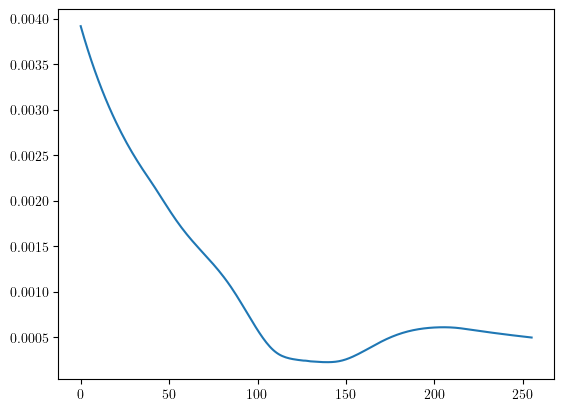

In [19]:
ir = np.where(midpts>1.)[0][0]
print(ir)
plt.plot(mRingAcc[:]/(2*np.pi*midpts[:]*np.diff(edge_coords)[:]))
print(mRingAcc[ir]/(2*np.pi*midpts[ir]*np.diff(edge_coords)[ir]))

orbit 380: Sig(1)=0.000259446434621687

In [48]:
q = 1e-4
dd = dsNoAcc.all_data()
dens_data = np.array(dd["athena_pp","dens"])
Nr = 256
istart = 0
iend = 256+1
edge_coords = np.linspace(0.4,1.6,Nr+1,endpoint=True)
print(dd.fcoords.shape)
coords = np.array(dd.fcoords)
midpts = (edge_coords[:-1]+edge_coords[1:])/2
fwidths = np.array(dd.fwidth)
print(dd.fwidth)
mRingNoAcc = np.zeros(Nr)
for j in range(istart,iend):
    reval = coords[j,0]
    for i, Sig in enumerate(dens_data):
        r = coords[i,0]
        if edge_coords[j] < r < edge_coords[j+1]:
            phi = coords[i,1]
            rsecn = np.sqrt(r**2 + 1 -2*r*np.cos(phi))
            x = r*np.cos(phi)
            y = r*np.sin(phi)
            dr = fwidths[i,0]
            dphi = fwidths[i,1]
            dA = r*dr*dphi
            dm = dA*Sig
            mRingNoAcc[j] += dm


(632832, 3)
[[0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 ...
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]] code_length


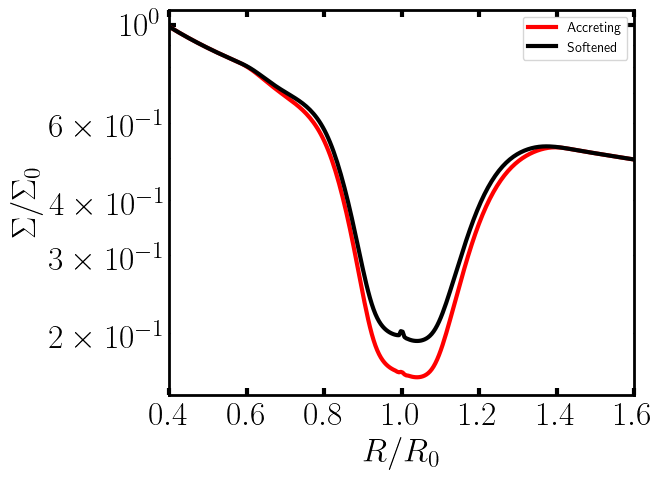

In [50]:
with mpl.rc_context(analytic):
    fig, ax = plt.subplots()
    Sig0 = 0.001
    ax.plot(midpts,mRingAcc/(2*np.pi*r*np.diff(edge_coords))/Sig0,c="r",label="Accreting")
    ax.plot(midpts,mRingNoAcc/(2*np.pi*r*np.diff(edge_coords))/Sig0,c="k",label="Softened")
    ax.set_ylabel("$\Sigma/\Sigma_0$")
    ax.set_xlabel("$R/R_0$")
    ax.set_xlim(0.4,1.6)
    ax.legend()
    ax.set_yscale("log")

In [51]:
fig.savefig("/Users/jtlaune/Desktop/globalSigProf.png",dpi=300,bbox_inches="tight")

# Density profile hill radius width 

In [12]:
iout = 380
dsAcc = yt.load(accRunDir + f"/ppd_cyl.out1.{iout:05}.athdf")
dsNoAcc = yt.load(noAccRunDir + f"/ppd_cyl.out1.{iout:05}.athdf")

yt : [WARNING  ] 2023-05-07 19:14:48,684 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-07 19:14:48,684 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-07 19:14:48,685 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-07 19:14:48,685 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-07 19:14:48,704 Parameters: current_time              = 2387.611
yt : [INFO     ] 2023-05-07 19:14:48,704 Parameters: domain_dimensions         = [ 256 1536    1]
yt : [INFO     ] 2023-05-07 19:14:48,705 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-07 19:14:48,705 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-07 19:14:48,705 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2023-05-07 19:14:48,710 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-07 19:14:48,711 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-07 19:14:48,711 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-07 19:14:48,711 Assuming 1.0 = 1.

In [17]:
q = 1e-4
rH = (q/3)**(1./3)
dd = dsAcc.all_data()
dens_data = np.array(dd["athena_pp","dens"])
Nr = 256
istart = 0
iend = 256+1
edge_coords = np.linspace(0.4,1.6,Nr+1,endpoint=True)
print(dd.fcoords.shape)
coords = np.array(dd.fcoords)
midpts = (edge_coords[:-1]+edge_coords[1:])/2
fwidths = np.array(dd.fwidth)
print(dd.fwidth)
mRingAcc = np.zeros(Nr)
for j in range(istart,iend):
    reval = coords[j,0]
    for i, Sig in enumerate(dens_data):
        r = coords[i,0]
        if edge_coords[j] < r < edge_coords[j+1]:
            phi = coords[i,1]
            x = r*np.cos(phi)
            y = r*np.sin(phi)
            if -rH<x<rH and (y>0):
                rsecn = np.sqrt(r**2 + 1 -2*r*np.cos(phi))
                dr = fwidths[i,0]
                dphi = fwidths[i,1]
                dA = r*dr*dphi
                dm = dA*Sig
                mRingAcc[j] += dm

(632832, 3)
[[0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 ...
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]] code_length


In [18]:
q = 1e-4
rH = (q/3)**(1./3)
dd = dsNoAcc.all_data()
dens_data = np.array(dd["athena_pp","dens"])
Nr = 256
istart = 0
iend = 256+1
edge_coords = np.linspace(0.4,1.6,Nr+1,endpoint=True)
print(dd.fcoords.shape)
coords = np.array(dd.fcoords)
midpts = (edge_coords[:-1]+edge_coords[1:])/2
fwidths = np.array(dd.fwidth)
print(dd.fwidth)
mRingNoAcc = np.zeros(Nr)
for j in range(istart,iend):
    reval = coords[j,0]
    for i, Sig in enumerate(dens_data):
        r = coords[i,0]
        if edge_coords[j] < r < edge_coords[j+1]:
            phi = coords[i,1]
            x = r*np.cos(phi)
            y = r*np.sin(phi)
            if (-rH<x<rH) and (y>0):
                rsecn = np.sqrt(r**2 + 1 -2*r*np.cos(phi))
                dr = fwidths[i,0]
                dphi = fwidths[i,1]
                dA = r*dr*dphi
                dm = dA*Sig
                mRingNoAcc[j] += dm

(632832, 3)
[[0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 ...
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]] code_length


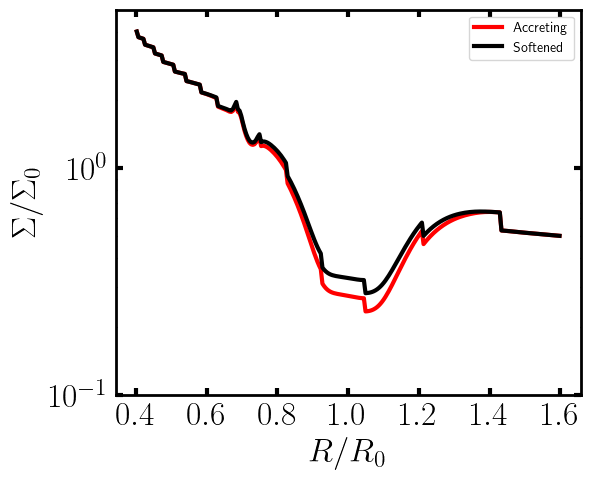

In [36]:
with mpl.rc_context(analytic):
    fig, ax = plt.subplots()
    Sig0 = 0.001
    ax.plot(midpts,mRingAcc/(2*rH*np.diff(edge_coords))/Sig0,c="r",label="Accreting")
    ax.plot(midpts,mRingNoAcc/(2*rH*np.diff(edge_coords))/Sig0,c="k",label="Softened")
    ax.set_yscale("log")
    ax.legend()
    ax.set_ylim(1e-1,5)
    ax.set_ylabel("$\Sigma/\Sigma_0$")
    ax.set_xlabel("$R/R_0$")

# Torque density profile

In [41]:
iout = 430

In [52]:
q = 1e-4
rH = (q/3)**(1./3)
ds = yt.load(accRunDir + f"/ppd_cyl.out1.{iout:05}.athdf")
dd = ds.all_data()
dens_data = np.array(dd["athena_pp","dens"])
Nr = 256
istart = 0
iend = 256+1
edge_coords = np.linspace(0.4,1.6,Nr+1,endpoint=True)
print(dd.fcoords.shape)
coords = np.array(dd.fcoords)
midpts = (edge_coords[:-1]+edge_coords[1:])/2
fwidths = np.array(dd.fwidth)
print(dd.fwidth)
Fx = np.zeros(Nr)
Fy = np.zeros(Nr)
for j in range(istart,iend):
    reval = coords[j,0]
    for i, Sig in enumerate(dens_data):
        r = coords[i,0]
        if edge_coords[j] < r < edge_coords[j+1]:
            phi = coords[i,1]
            rsecn = np.sqrt(r**2 + 1 -2*r*np.cos(phi))
            x = r*np.cos(phi)
            y = r*np.sin(phi)
            #if (x>0) and (np.abs(y)>rH):
            if True:
                dr = fwidths[i,0]
                dphi = fwidths[i,1]
                dA = r*dr*dphi
                dFx = dA*Sig*q*(1-x)/rsecn**3
                dFy = -dA*Sig*q*y/rsecn**3
                Fx[j] += dFx           
                Fy[j] += dFy

accMidpts = midpts.copy()
accFx = Fx.copy()
accFy = Fy.copy()

q = 1e-4
ds = yt.load(noAccRunDir + f"/ppd_cyl.out1.{iout:05}.athdf")
dd = ds.all_data()
dens_data = np.array(dd["athena_pp","dens"])
Nr = 256
istart = 0
iend = 256+1
edge_coords = np.linspace(0.4,1.6,Nr+1,endpoint=True)
print(dd.fcoords.shape)
coords = np.array(dd.fcoords)
midpts = (edge_coords[:-1]+edge_coords[1:])/2
fwidths = np.array(dd.fwidth)
print(dd.fwidth)
Fx = np.zeros(Nr)
Fy = np.zeros(Nr)
for j in range(istart,iend):
    reval = coords[j,0]
    for i, Sig in enumerate(dens_data):
        r = coords[i,0]
        if edge_coords[j] < r < edge_coords[j+1]:
            phi = coords[i,1]
            rsecn = np.sqrt(r**2 + 1 -2*r*np.cos(phi))
            x = r*np.cos(phi)
            y = r*np.sin(phi)
            #if (x>0) and (np.abs(y)>rH):
            if True:
                dr = fwidths[i,0]
                dphi = fwidths[i,1]
                dA = r*dr*dphi
                dFx = dA*Sig*q*(1-x)/rsecn**3
                dFy = -dA*Sig*q*y/rsecn**3
                Fx[j] += dFx           
                Fy[j] += dFy

noAccMidpts = midpts.copy()
noAccFx = Fx.copy()
noAccFy = Fy.copy()

yt : [WARNING  ] 2023-05-09 01:31:04,022 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-09 01:31:04,023 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-09 01:31:04,023 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-09 01:31:04,024 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-09 01:31:04,041 Parameters: current_time              = 2701.7737
yt : [INFO     ] 2023-05-09 01:31:04,041 Parameters: domain_dimensions         = [ 256 1536    1]
yt : [INFO     ] 2023-05-09 01:31:04,041 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-09 01:31:04,042 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-09 01:31:04,042 Parameters: cosmological_simulation   = 0


(632832, 3)
[[0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 ...
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]] code_length


yt : [WARNING  ] 2023-05-09 01:31:44,454 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-09 01:31:44,454 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-09 01:31:44,455 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-09 01:31:44,455 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-09 01:31:44,469 Parameters: current_time              = 2701.7664
yt : [INFO     ] 2023-05-09 01:31:44,470 Parameters: domain_dimensions         = [ 256 1536    1]
yt : [INFO     ] 2023-05-09 01:31:44,470 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-09 01:31:44,470 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-09 01:31:44,470 Parameters: cosmological_simulation   = 0


(632832, 3)
[[0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 ...
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]
 [0.0046875  0.00409062 1.        ]] code_length


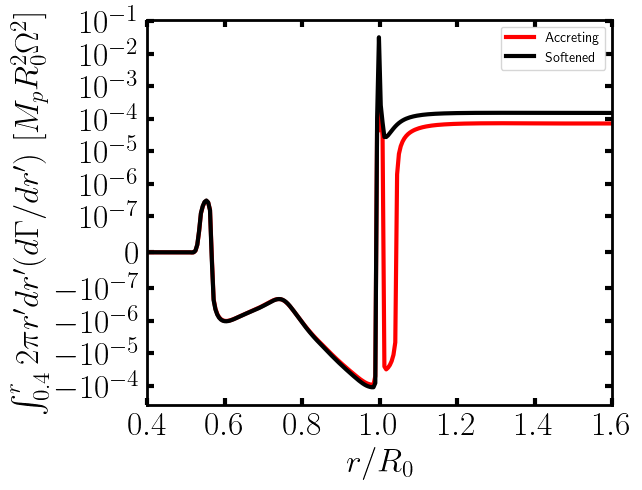

In [55]:
with mpl.rc_context(analytic):
    fig, ax = plt.subplots()
    ax.plot(accMidpts, np.cumsum(accFy/q),label="Accreting",c="r")
    ax.plot(noAccMidpts, np.cumsum(noAccFy/q),label="Softened",c="k")
    #ax.axvline(x=0.97,lw=1,ls="--",c="k")
    #ax.axvline(x=1.018,lw=1,ls="--",c="k")
    #ax.axvline(x=1.07,lw=1,ls="--",c="k")
    ax.set_yscale("symlog",linthresh=1e-7)
    ax.legend()
    #ax.set_title(r"Excluding region: $x>0$, $|y|>r_H$")
    ax.set_xlim(0.4,1.6)
    ax.set_ylabel(r"$\int_{0.4}^r 2\pi r'dr' (d\Gamma/dr')$ $[M_pR_0^2\Omega^2]$")
    ax.set_xlabel("$r/R_0$")

Now need to integrate torque densities to see if close to calculated ones from ppd_cyl.hst?

In [38]:
print(np.sum(2*np.pi*accMidpts*accFy))
print(np.sum(2*np.pi*noAccMidpts*noAccFy))

3.6211468040286604e-08
2.3133017412048132e-08


In [56]:
fig.savefig("/Users/jtlaune/Desktop/cumTorqRadProf.png",dpi=90,bbox_inches="tight")

# Torque density

## Zoomed in

In [ ]:
iout = 380
accFname = accRunDir+f"{iout:05}_large_chunk.npz"
noAccFname = noAccRunDir+f"{iout:05}_large_chunk.npz" 

In [13]:
dataAcc = athena_read.athdf(accRunDir+f"ppd_cyl.out1.{iout:05}.athdf")
dataNoAcc = athena_read.athdf(noAccRunDir+f"ppd_cyl.out1.{iout:05}.athdf")
#get_bbox(1-1.1*0.032,1+1.1*0.032,-0.032*1.1,0.032*1.1,dataAcc,accFname)
#get_bbox(1-1.1*0.032,1+1.1*0.032,-0.032*1.1,0.032*1.1,dataNoAcc,noAccFname)
get_bbox(0.97,1.07,-0.05,0.05,dataAcc,accFname)
get_bbox(0.97,1.07,-0.05,0.05,dataNoAcc,noAccFname)

In [14]:
dataAcc = np.load(accFname)
dataNoAcc = np.load(noAccFname)

In [33]:
interpxAcc,interpyAcc,interpxdotAcc,interpydotAcc = get_cartInterpVels(dataAcc, 30, 30)
interpxNoAcc,interpyNoAcc,interpxdotNoAcc,interpydotNoAcc = get_cartInterpVels(dataNoAcc, 30, 30)

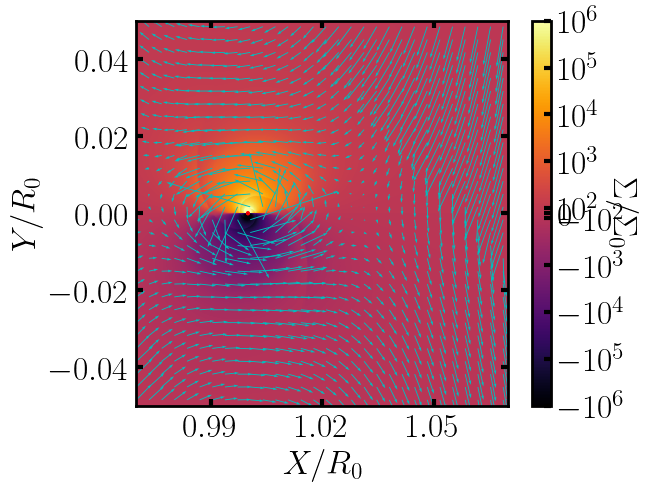

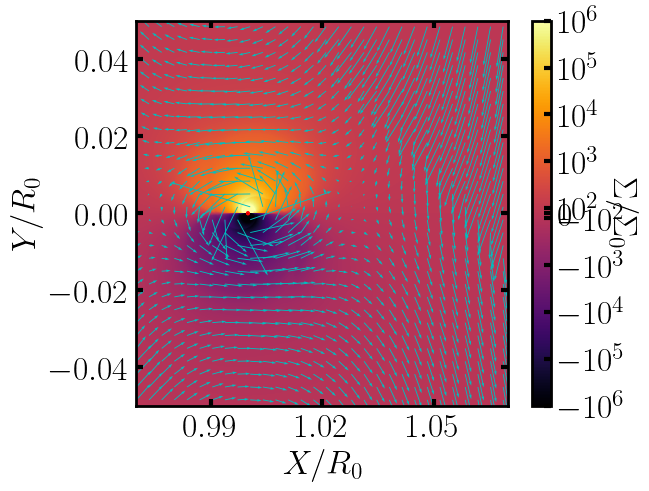

In [34]:
with mpl.rc_context(analytic):
    torqBounds = 1000000
    q = 1e-4
    fig, ax = plt.subplots()
    Sig0 = 0.001
    RR, TT = np.meshgrid(dataAcc["r"], dataAcc["th"])
    XX = RR * np.cos(TT)
    YY = RR * np.sin(TT)
    CC = (
        dataAcc["rho"]
        / Sig0
        * YY
        / np.sqrt((XX - 1) ** 2 + YY**2)
        / np.sqrt((XX - 1) ** 2 + YY**2)
        / np.sqrt((XX - 1) ** 2 + YY**2)
    )
    # cs = ax.pcolormesh(XX,YY,CC,cmap="inferno",vmin=-torqBounds,vmax=torqBounds)#,norm=colors.LogNorm(vmin=1e-1,vmax=1e1)
    cs = ax.pcolormesh(
        RR,
        TT,
        CC,
        cmap="inferno",
        norm=colors.SymLogNorm(linthresh=1000, vmin=-torqBounds, vmax=torqBounds),
    )
    ax.quiver(interpxAcc,interpyAcc,interpxdotAcc,interpydotAcc,linewidth=1,color="c",scale=1)
    cb = plt.colorbar(cs)
    cb.ax.set_ylabel(r"$\Sigma/\Sigma_0$", rotation=270, labelpad=10)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
    ax.set_xlabel(r"$X/R_0$")
    ax.set_ylabel(r"$Y/R_0$")
    circ = plt.Circle((1, 0), 0.00032, color="r", fill=False, zorder=100001)
    ax.add_patch(circ)
    circ = plt.Circle((1, 0), 0.00036, color="r", fill=False, zorder=100001)
    ax.add_patch(circ)

    fig, ax = plt.subplots()
    Sig0 = 0.001
    RR, TT = np.meshgrid(dataNoAcc["r"], dataNoAcc["th"])
    XX = RR * np.cos(TT)
    YY = RR * np.sin(TT)
    CC = (
        dataNoAcc["rho"]
        / Sig0
        * YY
        / np.sqrt((XX - 1) ** 2 + YY**2)
        / np.sqrt((XX - 1) ** 2 + YY**2)
        / np.sqrt((XX - 1) ** 2 + YY**2)
    )
    # cs = ax.pcolormesh(XX,YY,CC,cmap="inferno",vmin=-torqBounds,vmax=torqBounds)#,norm=colors.LogNorm(vmin=1e-1,vmax=1e1)
    cs = ax.pcolormesh(
        RR,
        TT,
        CC,
        cmap="inferno",
        norm=colors.SymLogNorm(linthresh=1000, vmin=-torqBounds, vmax=torqBounds),
    )
    ax.quiver(interpxNoAcc,interpyNoAcc,interpxdotNoAcc,interpydotNoAcc,linewidth=1,color="c",scale=1)
    cb = plt.colorbar(cs)
    cb.ax.set_ylabel(r"$\Sigma/\Sigma_0$", rotation=270, labelpad=10)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
    ax.set_xlabel(r"$X/R_0$")
    ax.set_ylabel(r"$Y/R_0$")
    circ = plt.Circle((1, 0), 0.00032, color="r", fill=False, zorder=100001)
    ax.add_patch(circ)
    circ = plt.Circle((1, 0), 0.00036, color="r", fill=False, zorder=100001)
    ax.add_patch(circ)


## [0.97,1.07,-np.pi*0.25,np.pi*0.25]

In [4]:
iout = 380
accFname = accRunDir+f"{iout:05}_large_chunk.npz"
noAccFname = noAccRunDir+f"{iout:05}_large_chunk.npz" 

In [9]:
dataAcc = athena_read.athdf(accRunDir+f"ppd_cyl.out1.{iout:05}.athdf")
dataNoAcc = athena_read.athdf(noAccRunDir+f"ppd_cyl.out1.{iout:05}.athdf")
#get_bbox(1-1.1*0.032,1+1.1*0.032,-0.032*1.1,0.032*1.1,dataAcc,accFname)
#get_bbox(1-1.1*0.032,1+1.1*0.032,-0.032*1.1,0.032*1.1,dataNoAcc,noAccFname)
get_bbox(0.97,1.07,-np.pi*0.25,np.pi*0.25,dataAcc,accFname)
get_bbox(0.97,1.07,-np.pi*0.25,np.pi*0.25,dataNoAcc,noAccFname)

In [10]:
dataAcc = np.load(accFname)
dataNoAcc = np.load(noAccFname)

In [10]:
interpx,interpy,interpxdot,interpydot = get_cartInterpVels(dataAcc, 500, 500)

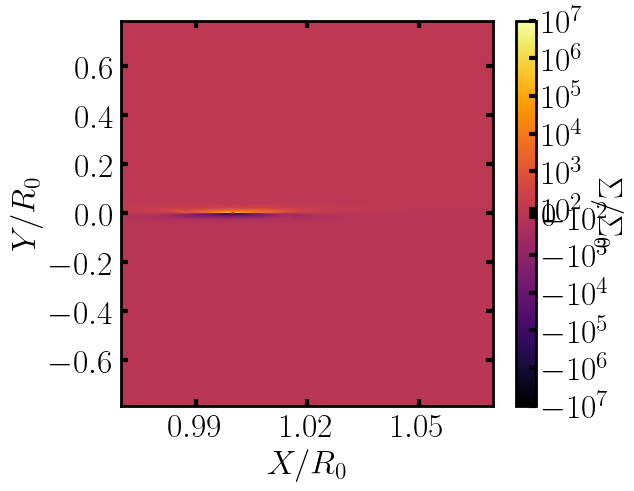

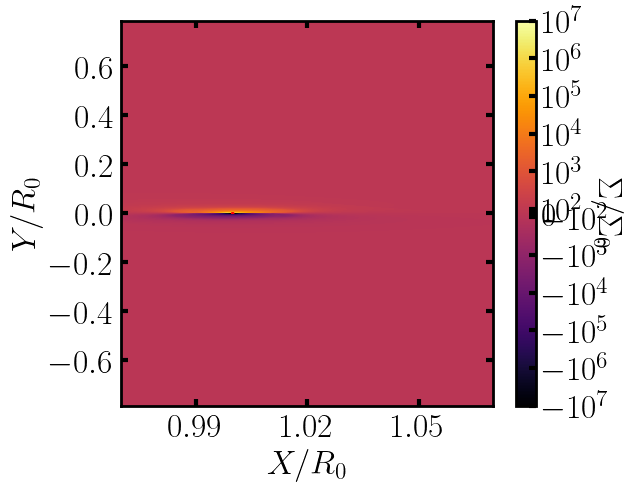

In [12]:
with mpl.rc_context(analytic):
    torqBounds = 500
    q = 1e-4
    fig, ax = plt.subplots()
    Sig0 = 0.001
    RR,TT = np.meshgrid(dataAcc["r"],dataAcc["th"])
    XX = RR*np.cos(TT)
    YY = RR*np.sin(TT)
    CC = dataAcc["rho"]/Sig0 * YY/np.sqrt((XX-1)**2+YY**2)/np.sqrt((XX-1)**2+YY**2)/np.sqrt((XX-1)**2+YY**2)
    #cs = ax.pcolormesh(XX,YY,CC,cmap="inferno",vmin=-torqBounds,vmax=torqBounds)#,norm=colors.LogNorm(vmin=1e-1,vmax=1e1)
    cs = ax.pcolormesh(RR,TT,CC,cmap="inferno",norm=colors.SymLogNorm(linthresh=1000,vmin=-1e7,vmax=1e7))
    #ax.streamplot(interpx,interpy,interpxdot,interpydot,linewidth=1,color="c")
    cb = plt.colorbar(cs)
    cb.ax.set_ylabel(r"$\Sigma/\Sigma_0$",rotation=270,labelpad=10)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
    ax.set_xlabel(r"$X/R_0$")
    ax.set_ylabel(r"$Y/R_0$")
    circ = plt.Circle((1,0),0.00032, color='r',fill=False,zorder=100001)
    ax.add_patch(circ)
    circ = plt.Circle((1,0),0.00036, color='r',fill=False,zorder=100001)
    ax.add_patch(circ)

    fig, ax = plt.subplots()
    Sig0 = 0.001
    RR,TT = np.meshgrid(dataNoAcc["r"],dataNoAcc["th"])
    XX = RR*np.cos(TT)
    YY = RR*np.sin(TT)
    CC = dataNoAcc["rho"]/Sig0 * YY/np.sqrt((XX-1)**2+YY**2)/np.sqrt((XX-1)**2+YY**2)/np.sqrt((XX-1)**2+YY**2)
    #cs = ax.pcolormesh(XX,YY,CC,cmap="inferno",vmin=-torqBounds,vmax=torqBounds)#,norm=colors.LogNorm(vmin=1e-1,vmax=1e1)
    cs = ax.pcolormesh(RR,TT,CC,cmap="inferno",norm=colors.SymLogNorm(linthresh=1000,vmin=-1e7,vmax=1e7))
    #ax.streamplot(interpx,interpy,interpxdot,interpydot,linewidth=1,color="c")
    cb = plt.colorbar(cs)
    cb.ax.set_ylabel(r"$\Sigma/\Sigma_0$",rotation=270,labelpad=10)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
    ax.set_xlabel(r"$X/R_0$")
    ax.set_ylabel(r"$Y/R_0$")
    circ = plt.Circle((1,0),0.00032, color='r',fill=False,zorder=100001)
    ax.add_patch(circ)
    circ = plt.Circle((1,0),0.00036, color='r',fill=False,zorder=100001)
    ax.add_patch(circ)